# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
# import API key for openweathermaps
from api_keys1 import weather_api_key


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulsteinvik
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | fuman
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | reitz
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | noumea
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | san luis de la loma
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | pyay
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | djibo
Processing Record 21 of Set 1 | naryn
Processing Record 22 of Set 1 | talnak

Processing Record 39 of Set 4 | prince rupert
Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | surskoye
Processing Record 42 of Set 4 | egilsstadir
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | acarau
Processing Record 45 of Set 4 | kone
Processing Record 46 of Set 4 | paracuru
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | el campo
Processing Record 49 of Set 4 | broken hill
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | sorong
Processing Record 2 of Set 5 | changji
Processing Record 3 of Set 5 | kingston
Processing Record 4 of Set 5 | tammun
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | borkum
Processing Record 8 of Set 5 | harper
Processing Record 9 of Set 5 | chipinge
Processing Record 10 of Set 5 | amahai
Processing Record 11 of Set 5 | wenchang
Processing Record 12 of Set 5 | jamestown
Processing Record 13 of S

Processing Record 34 of Set 8 | rockland
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | bel ombre
Processing Record 37 of Set 8 | ataq
Processing Record 38 of Set 8 | waingapu
Processing Record 39 of Set 8 | murun-kuren
Processing Record 40 of Set 8 | kudahuvadhoo
Processing Record 41 of Set 8 | hasaki
Processing Record 42 of Set 8 | tamanrasset
Processing Record 43 of Set 8 | milharado
Processing Record 44 of Set 8 | baukau
Processing Record 45 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 46 of Set 8 | raja
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | poronaysk
Processing Record 49 of Set 8 | freeport
Processing Record 0 of Set 9 | moramanga
Processing Record 1 of Set 9 | morazan
Processing Record 2 of Set 9 | mount gambier
Processing Record 3 of Set 9 | i-n-salah
Processing Record 4 of Set 9 | mariehamn
Processing Record 5 of Set 9 | vila franca do campo
Processing Record 6 of Set 9 | roma
Processing Record 7 

Processing Record 22 of Set 12 | brandon
Processing Record 23 of Set 12 | mogocha
Processing Record 24 of Set 12 | sawakin
Processing Record 25 of Set 12 | alice springs
Processing Record 26 of Set 12 | noyabrsk
Processing Record 27 of Set 12 | nyaunglebin
Processing Record 28 of Set 12 | staroyur'yevo
Processing Record 29 of Set 12 | joshimath
Processing Record 30 of Set 12 | moree
Processing Record 31 of Set 12 | labuan lombok
City not found. Skipping...
Processing Record 32 of Set 12 | revelstoke
Processing Record 33 of Set 12 | betio village
Processing Record 34 of Set 12 | mason city
Processing Record 35 of Set 12 | karratha
Processing Record 36 of Set 12 | olyokminsk
Processing Record 37 of Set 12 | longboat key
Processing Record 38 of Set 12 | fortuna
Processing Record 39 of Set 12 | westport
Processing Record 40 of Set 12 | energetik
Processing Record 41 of Set 12 | tokar
Processing Record 42 of Set 12 | kuanda
-----------------------------
Data Retrieval Complete      
-------

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulsteinvik,62.3432,5.8487,2.64,60,0,3.13,NO,1698708858
1,new norfolk,-42.7826,147.0587,13.72,45,40,5.58,AU,1698708861
2,port-aux-francais,-49.3500,70.2167,3.07,94,99,18.05,TF,1698708856
3,waitangi,-43.9535,-176.5597,14.34,81,100,5.36,NZ,1698708865
4,port lincoln,-34.7333,135.8667,14.84,49,64,4.48,AU,1698708917


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [47]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,2.64,60,0,3.13,NO,1698708858
1,new norfolk,-42.7826,147.0587,13.72,45,40,5.58,AU,1698708861
2,port-aux-francais,-49.3500,70.2167,3.07,94,99,18.05,TF,1698708856
3,waitangi,-43.9535,-176.5597,14.34,81,100,5.36,NZ,1698708865
4,port lincoln,-34.7333,135.8667,14.84,49,64,4.48,AU,1698708917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

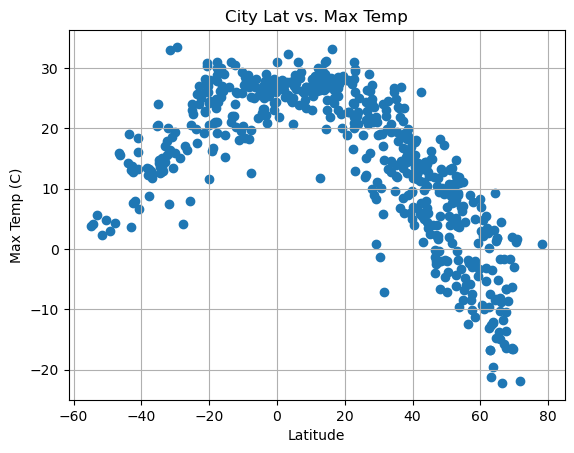

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
plt.title("City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

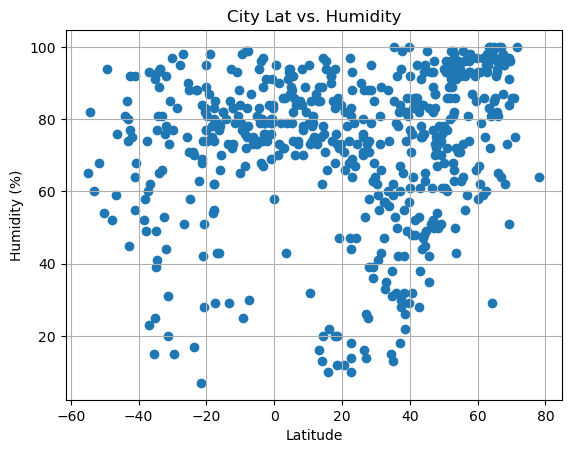

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

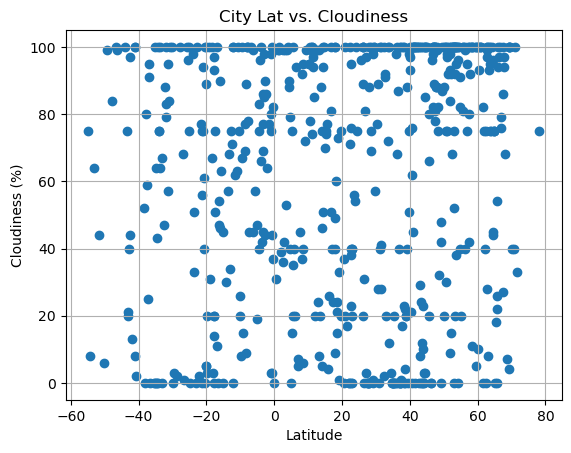

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

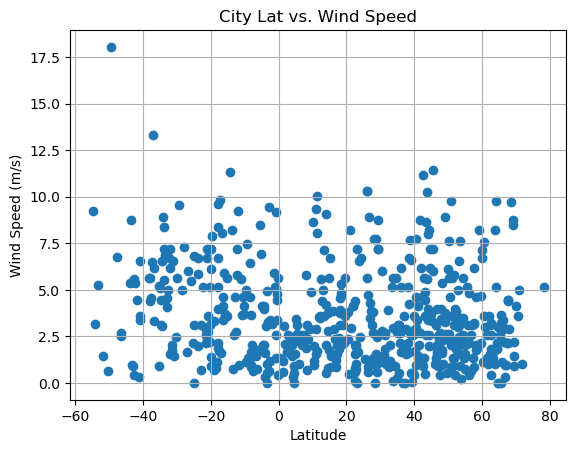

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
plt.title("City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
y_value = city_data_df["Lng"]
(slope, intercept, rvalue, pvalue, sderr) = linregress(city_data_df["Lat"], y_value)
regress_values = city_data_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,2.64,60,0,3.13,NO,1698708858
5,fuman,37.2273,49.3142,16.74,60,100,1.95,IR,1698709152
7,petropavlovsk-kamchatsky,53.0452,158.6483,4.33,82,0,5.00,RU,1698708911
14,san luis de la loma,17.2706,-100.8939,27.17,85,24,1.54,MX,1698708893
15,enewetak,11.3474,162.3373,28.69,79,94,10.03,MH,1698708843


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]
southern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,new norfolk,-42.7826,147.0587,13.72,45,40,5.58,AU,1698708861
2,port-aux-francais,-49.3500,70.2167,3.07,94,99,18.05,TF,1698708856
3,waitangi,-43.9535,-176.5597,14.34,81,100,5.36,NZ,1698708865
4,port lincoln,-34.7333,135.8667,14.84,49,64,4.48,AU,1698708917
6,edinburgh of the seven seas,-37.0676,-12.3116,12.95,93,95,13.30,SH,1698708870


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8655878793860264


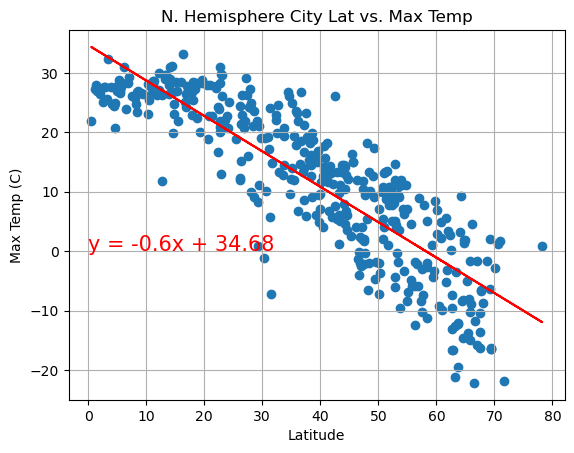

In [64]:
# Linear regression on Northern Hemisphere
n_lat = northern_hemi_df['Lat']
n_temp = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.title("N. Hemisphere City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(0, 0), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.7464198698717753


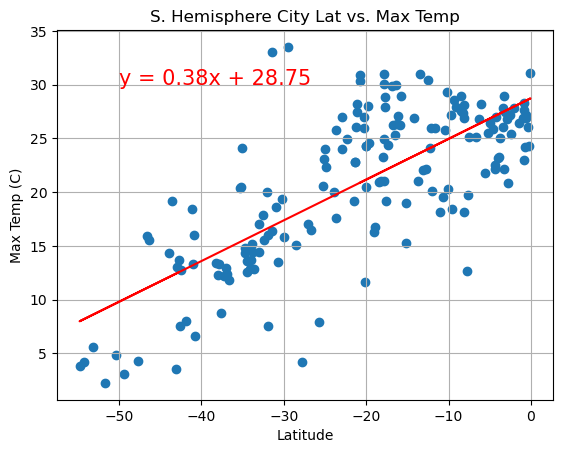

In [65]:
# Linear regression on Southern Hemisphere
s_lat = southern_hemi_df['Lat']
s_temp = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.title("S. Hemisphere City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** Based on the consitency of both datasets, we are able to conclude that maximum temperture degrees on both sides of the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21007431016895817


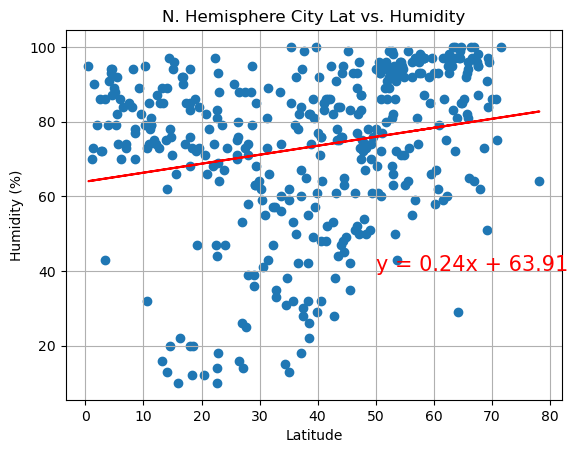

In [66]:
# Northern Hemisphere
n_lat = northern_hemi_df['Lat']
n_hum = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.title("N. Hemisphere City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.21162885750611102


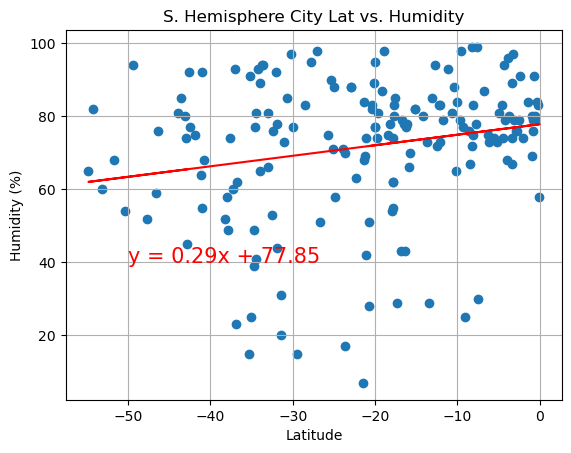

In [67]:
# Southern Hemisphere
s_lat = southern_hemi_df['Lat']
s_hum = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_hum)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.title("S. Hemisphere City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** There is not a strong enough correlation between the humdity of North and South Hemisphere because humidity is usually high near a body of water.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21007431016895817


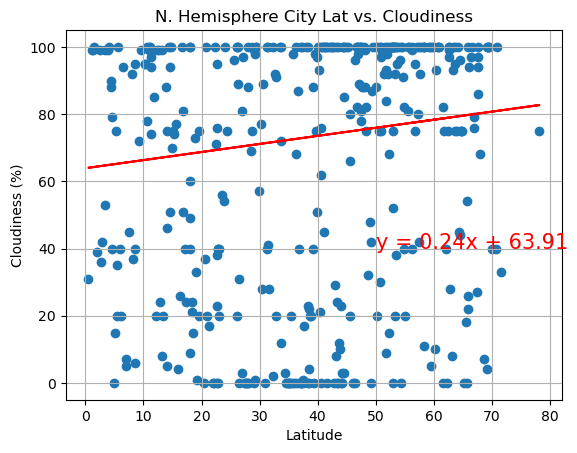

In [68]:
# Northern Hemisphere
n_lat = northern_hemi_df['Lat']
n_cloud = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.title("N. Hemisphere City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.07622871659461085


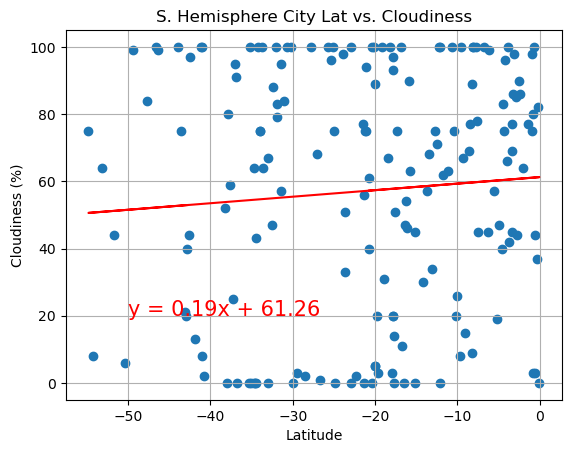

In [69]:
# Southern Hemisphere
s_lat = southern_hemi_df['Lat']
s_cloud = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.title("S. Hemisphere City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 20), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** Correlation is not strong between datasets

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03171476355614677


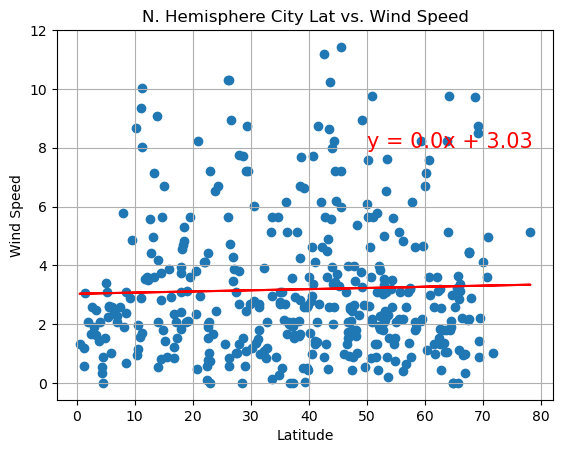

In [70]:
# Northern Hemisphere
n_lat = northern_hemi_df['Lat']
n_wind = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.title("N. Hemisphere City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 8), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.19725233442109685


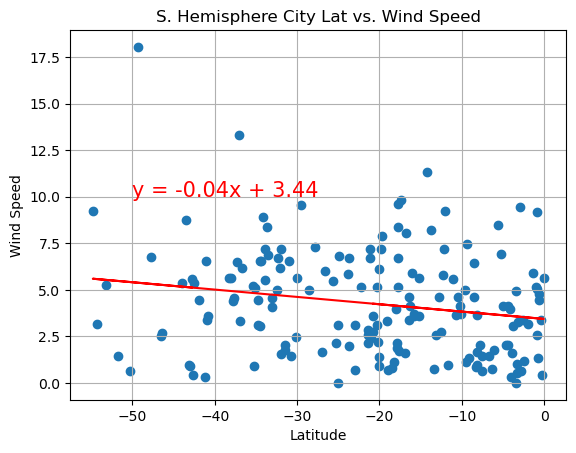

In [72]:
# Southern Hemisphere
s_lat = southern_hemi_df['Lat']
s_wind = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.title("S. Hemisphere City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 10), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** There is not a strong correlation between these two datasets